In [1]:
!source ./bin/activate

In [2]:
import pandas as pd 
from sklearn.impute import SimpleImputer  
import numpy as np
from sklearn.preprocessing import LabelEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/redashu/Datasets/refs/heads/master/data_preprocess1.csv")

In [4]:
print(df)

    Country   Age   Salary Purchased
0    France  44.0  72000.0        No
1     Spain  27.0  48000.0       Yes
2   Germany  30.0  54000.0        No
3     Spain  38.0  61000.0        No
4   Germany  40.0      NaN       Yes
5    France  35.0  58000.0       Yes
6     Spain   NaN  52000.0        No
7    France  48.0  79000.0       Yes
8   Germany  50.0  83000.0        No
9    France  37.0  67000.0       Yes
10  Germany  28.0  49000.0       Yes
11   France  42.0  75000.0        No
12    Spain  33.0  56000.0       Yes
13  Germany  45.0  77000.0        No
14   France  29.0  51000.0       Yes
15    Spain  51.0  85000.0        No
16  Germany  36.0      NaN        No
17   France  31.0  55000.0        No
18    Spain  39.0  63000.0       Yes
19  Germany  47.0  80000.0       Yes
20   France  26.0  47000.0        No
21    Spain  32.0  53000.0        No
22  Germany  41.0  71000.0       Yes
23   France  49.0  82000.0        No
24    Spain  34.0  57000.0       Yes
25  Germany  43.0  74000.0        No
2

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    30 non-null     object 
 1   Age        29 non-null     float64
 2   Salary     28 non-null     float64
 3   Purchased  30 non-null     object 
dtypes: float64(2), object(2)
memory usage: 1.1+ KB


In [6]:
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [7]:
df.tail()

,Country,Age,Salary,Purchased
25,Germany,43.0,74000.0,No
26,France,52.0,88000.0,Yes
27,Spain,46.0,78000.0,No
28,Germany,25.0,45000.0,Yes
29,France,53.0,90000.0,No


In [8]:
df['Age']

0     44.0
1     27.0
2     30.0
3     38.0
4     40.0
5     35.0
6      NaN
7     48.0
8     50.0
9     37.0
10    28.0
11    42.0
12    33.0
13    45.0
14    29.0
15    51.0
16    36.0
17    31.0
18    39.0
19    47.0
20    26.0
21    32.0
22    41.0
23    49.0
24    34.0
25    43.0
26    52.0
27    46.0
28    25.0
29    53.0
Name: Age, dtype: float64

In [9]:
df[['Age', 'Salary']]

,Age,Salary
0,44.0,72000.0
1,27.0,48000.0
2,30.0,54000.0
3,38.0,61000.0
4,40.0,NaN
5,35.0,58000.0
6,NaN,52000.0
7,48.0,79000.0
8,50.0,83000.0
9,37.0,67000.0


In [10]:
df.iloc[:]

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [11]:
input_features = df.iloc[:,0:3].values
label = df.iloc[:,-1].values

In [12]:
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [13]:
marlo_impute = SimpleImputer(missing_values=np.nan,strategy='mean')

In [14]:
marlo_impute.fit(input_features[:,1:3])  
input_features[:,1:3] = marlo_impute.transform(input_features[:,1:3]) 

In [15]:
print(input_features)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 66071.42857142857]
 ['France' 35.0 58000.0]
 ['Spain' 39.0 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]
 ['Germany' 28.0 49000.0]
 ['France' 42.0 75000.0]
 ['Spain' 33.0 56000.0]
 ['Germany' 45.0 77000.0]
 ['France' 29.0 51000.0]
 ['Spain' 51.0 85000.0]
 ['Germany' 36.0 66071.42857142857]
 ['France' 31.0 55000.0]
 ['Spain' 39.0 63000.0]
 ['Germany' 47.0 80000.0]
 ['France' 26.0 47000.0]
 ['Spain' 32.0 53000.0]
 ['Germany' 41.0 71000.0]
 ['France' 49.0 82000.0]
 ['Spain' 34.0 57000.0]
 ['Germany' 43.0 74000.0]
 ['France' 52.0 88000.0]
 ['Spain' 46.0 78000.0]
 ['Germany' 25.0 45000.0]
 ['France' 53.0 90000.0]]


In [16]:
label

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes',
       'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
       'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No'],
      dtype=object)

In [17]:
le = LabelEncoder()
label = le.fit_transform(label)
print(label)

[0 1 0 0 1 1 0 1 0 1 1 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 0 1 0]


In [18]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])],remainder='passthrough')

In [19]:
input_features=ct.fit_transform(input_features)
print(input_features)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 66071.42857142857]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 39.0 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 1.0 0.0 28.0 49000.0]
 [1.0 0.0 0.0 42.0 75000.0]
 [0.0 0.0 1.0 33.0 56000.0]
 [0.0 1.0 0.0 45.0 77000.0]
 [1.0 0.0 0.0 29.0 51000.0]
 [0.0 0.0 1.0 51.0 85000.0]
 [0.0 1.0 0.0 36.0 66071.42857142857]
 [1.0 0.0 0.0 31.0 55000.0]
 [0.0 0.0 1.0 39.0 63000.0]
 [0.0 1.0 0.0 47.0 80000.0]
 [1.0 0.0 0.0 26.0 47000.0]
 [0.0 0.0 1.0 32.0 53000.0]
 [0.0 1.0 0.0 41.0 71000.0]
 [1.0 0.0 0.0 49.0 82000.0]
 [0.0 0.0 1.0 34.0 57000.0]
 [0.0 1.0 0.0 43.0 74000.0]
 [1.0 0.0 0.0 52.0 88000.0]
 [0.0 0.0 1.0 46.0 78000.0]
 [0.0 1.0 0.0 25.0 45000.0]
 [1.0 0.0 0.0 53.0 90000.0]]


In [20]:
traing_input,testing_input,train_label,test_label=train_test_split(input_features,label,test_size=0.1)

In [21]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
classifier.fit(traing_input, train_label)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [22]:
y_pred = classifier.predict(testing_input)

In [23]:
print("Model Evaluation:")
print(f"Accuracy: {accuracy_score(test_label, y_pred):.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(test_label, y_pred))
print("\nClassification Report:")
print(classification_report(test_label, y_pred))

Model Evaluation:
Accuracy: 0.33

Confusion Matrix:
[[0 0]
 [2 1]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.33      0.50         3

    accuracy                           0.33         3
   macro avg       0.50      0.17      0.25         3
weighted avg       1.00      0.33      0.50         3



/home/ubuntu/usgs-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ubuntu/usgs-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/ubuntu/usgs-ml/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [24]:
new_data = np.array([['Germany', 30, 50000]])
new_data[:, 1:3] = marlo_impute.transform(new_data[:, 1:3])  # Handle potential missing values
new_data = ct.transform(new_data)  # Apply same preprocessing
prediction = classifier.predict(new_data)
predicted_purchase = le.inverse_transform(prediction)

print("\nExample Prediction:")
print(f"For Germany, Age=30, Salary=50000, Predicted Purchase: {predicted_purchase[0]}")


Example Prediction:
For Germany, Age=30, Salary=50000, Predicted Purchase: No


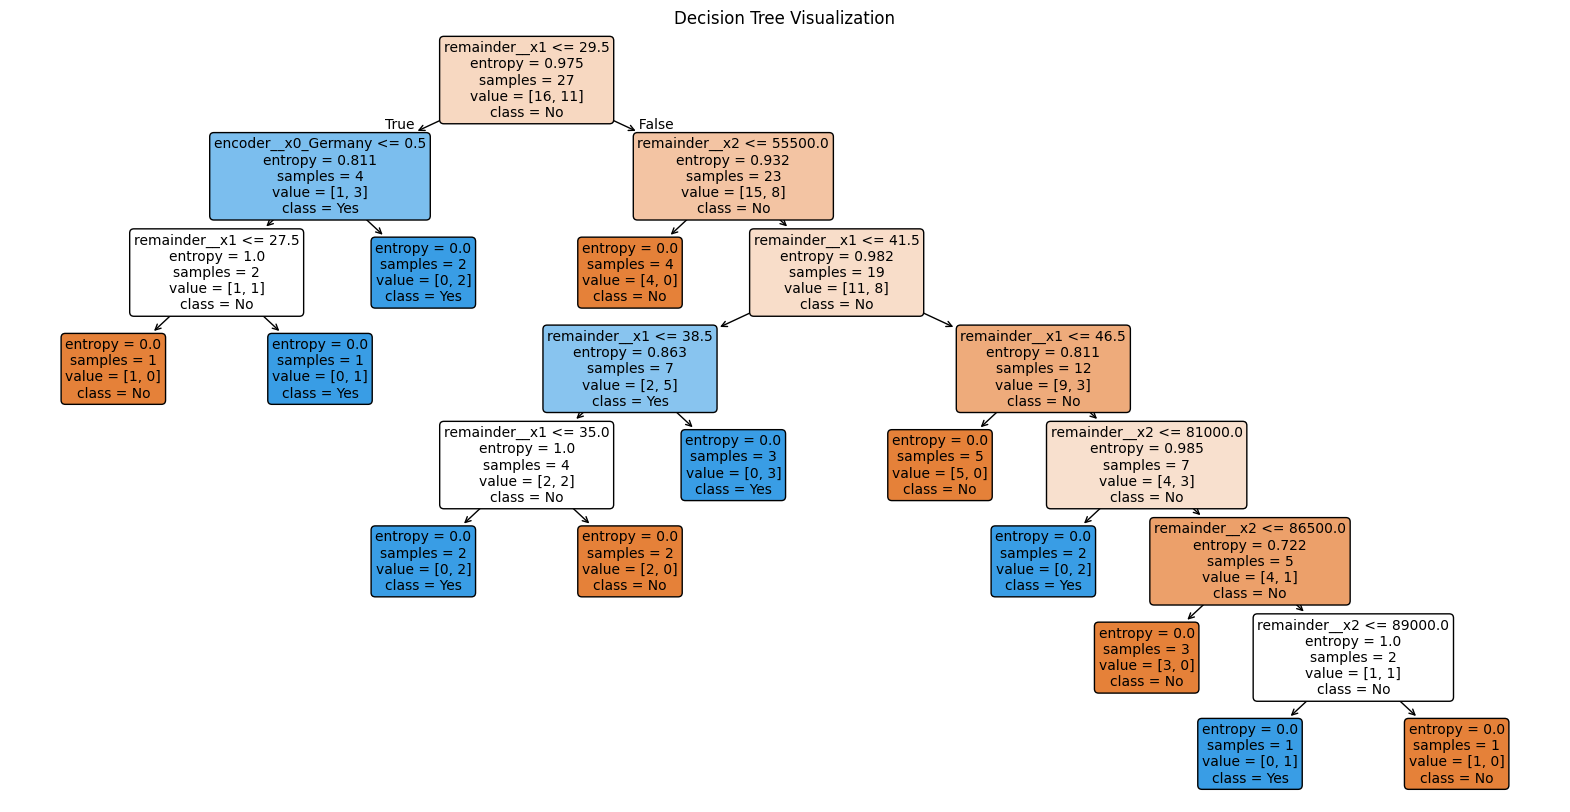

In [25]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# After training your classifier (classifier.fit())
plt.figure(figsize=(20,10))
plot_tree(classifier, 
          feature_names=ct.get_feature_names_out(),  # Get feature names from ColumnTransformer
          class_names=le.classes_,      # Get original class names
          filled=True, 
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

In [26]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a DOT file
dot_data = export_graphviz(classifier,
                          out_file=None,
                          feature_names=ct.get_feature_names_out(),
                          class_names=le.classes_,
                          filled=True,
                          rounded=True,
                          special_characters=True)

# Create and render the graph
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves to decision_tree.pdf
                   # Opens the visualization

'decision_tree.pdf'

In [27]:
traing_input,testing_input,train_label,test_label=train_test_split(input_features,label,test_size=0.1)

In [28]:
classifier = DecisionTreeClassifier()

In [29]:
trained_model = classifier.fit(traing_input,train_label)

In [30]:
predicted_values = trained_model.predict(testing_input)

In [31]:
print(predicted_values)

[0 1 0]


In [32]:
print(test_label)

[1 0 0]


In [33]:
accuracy_score(test_label,predicted_values)

0.3333333333333333

In [34]:
marlo_new_data = np.array([['Spain', '39', '51000']])

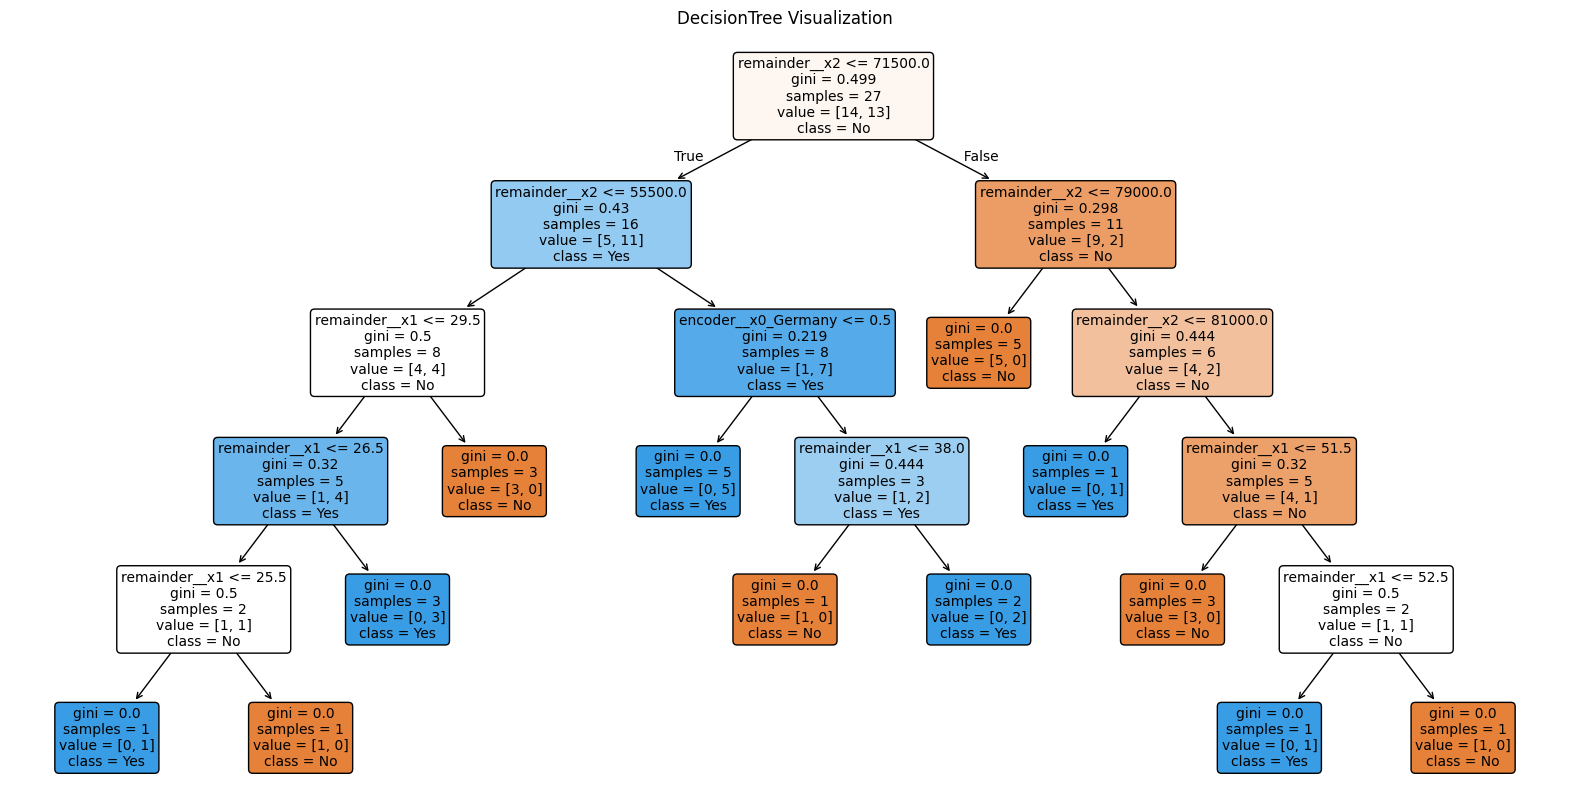

In [35]:
plt.figure(figsize=(20,10))
plot_tree(classifier,
          feature_names=ct.get_feature_names_out(),
          class_names=le.classes_,
          filled=True,
          fontsize=10,
          rounded=True)
plt.title("DecisionTree Visualization")
plt.show()

In [36]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [37]:
ct.get_feature_names_out()

array(['encoder__x0_France', 'encoder__x0_Germany', 'encoder__x0_Spain',
       'remainder__x1', 'remainder__x2'], dtype=object)